<h1 style='color:blue'>Carteiro Virtual - Reconhecimento de números escritos a mão usando</h1>

Vejamos um exemplo concreto de uma rede neural 
para a classificar os números escritos a mão. 

O problema que estamos tentando resolver aqui é classificar imagens em escala de cinza de letras de números escritos a mão de tal forma que depois a gente possa desenvolver um programa que lê um digito que uma pessoa escreveu e o programa tem que dizer qual o número que ela escreveu. 

<img src='correios.jpg' width="50%"/>


***O MNIST***
 
Mnist é um conjunto de dados de imagens, um clássico na comunidade de aprendizagem de máquinas, montado pelo Instituto Nacional de Padrões e Tecnologia (o NIST em MNIST) na década de 1980.

Exemplo das imagens do MNIST
<img src='mnist_examples.png' width="50%"/>

Como está organizado o MNIST
<img src='mnist_img_classe.png' width="30%"/>

### IMPORTANDO O MNIST

In [2]:
from tensorflow.keras.datasets import mnist
import numpy as np

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
train_labels[0]

5

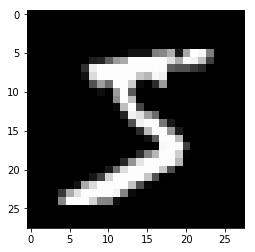

5


In [6]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.imshow(train_images[0], cmap='gray')
plt.show()

print(train_labels[0])

## VERIFICANDO O TAMANHO DO DATASET

In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
np.unique(test_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

### FLATTENING

In [11]:
train_images = train_images.reshape((60000, 28*28 ))
test_images  = test_images.reshape((10000, 28*28 ))

### Normalizando

In [12]:
train_images = train_images.astype('float32') / 255
test_images  = test_images.astype('float32') / 255

In [13]:
train_images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

### Categorizando One Hot Encoder

In [14]:
from tensorflow.keras.utils import to_categorical

## 0 = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
## 1 = [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
## 2 = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
...
## 9 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


train_labels = to_categorical(train_labels)
test_labels  = to_categorical(test_labels)



In [15]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## Importando Tensorflow e keras

In [16]:
from tensorflow.keras import models, layers

### Criando a rede neural

In [19]:
model = models.Sequential()
model.add(layers.Dense(32, activation='sigmoid', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


## Criando compilador keras

In [20]:
model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics=['accuracy']
             )

## Treinando a Rede Neural

In [22]:
model.fit(train_images, train_labels, epochs=10, batch_size=128)

Epoch 1/10


InternalError: Blas GEMM launch failed : a.shape=(128, 784), b.shape=(784, 32), m=128, n=32, k=784
	 [[Node: dense_1/MatMul = MatMul[T=DT_FLOAT, _class=["loc:@training/RMSprop/gradients/dense_1/MatMul_grad/MatMul_1"], transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/device:GPU:0"](_arg_dense_1_input_0_0/_27, dense_1/MatMul/ReadVariableOp)]]
	 [[Node: training/RMSprop/gradients/AddN/_55 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_221_training/RMSprop/gradients/AddN", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

## VERIFICANDO A ACURÁCIA DA REDE

## Salvando o modelo